# Prova Final - Machine Learning

**Nome do aluno**: <font color='red'>Luca Mizrahi</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta. Faça o seu trabalho de maneira ética! Se você recebeu ajuda de sistemas de apoio inteligentes (por exemplo, ChatGPT, Bard, CoPilot, etc) DECLARE CLARAMENTE ONDE VOCÊ RECEBEU AJUDA para não configurar plágio (definido como "declarar como próprio o trabalho construido por outrem - neste caso um sistema computacional")

## Contexto do problema

Vamos trabalhar com um *dataset* de *features* de maçãs. Abaixo temos a descrição do *dataset*. Sua tarefa é construir um modelo de classificação para este dataset.

O *dataset* foi obtido em https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality. A documentação do *dataset* foi copiada do *site* acima:

---

### About Dataset

Description:

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

Key Features:

- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

Potential Use Cases:

- Fruit Classification: Develop a classification model to categorize fruits based on their features.
- Quality Prediction: Build a model to predict the quality rating of fruits using various attributes.

The dataset was generously provided by an American agriculture company. The data has been scaled and cleaned for ease of use.

If you find this dataset useful, your support through an upvote would be greatly appreciated ❤️🙂 Thank you

---

In [1]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
def load_data(file_path: Path) -> pd.DataFrame:
    data = pd.read_csv(file_path)

    # Tem uma linha com valores nulos, que o autor do dataset usou
    # para manter o nome dele. Vamos remover essa linha.
    data = data.dropna()

    # Vamos remover a coluna de ID, que não é relevante para o modelo.
    data = data.drop(columns=['A_id'])

    # Vamos converter a coluna de Acidity para float.
    data['Acidity'] = data['Acidity'].astype(float)

    # Vamos separar as features e o target.
    X = data.drop(columns=['Quality']).copy()
    y = data['Quality'].copy()

    # Vamos fazer a separação entre treino e teste.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
    )

    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = load_data('apple_quality.csv')

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 3994 to 3174
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3200 non-null   float64
 1   Weight       3200 non-null   float64
 2   Sweetness    3200 non-null   float64
 3   Crunchiness  3200 non-null   float64
 4   Juiciness    3200 non-null   float64
 5   Ripeness     3200 non-null   float64
 6   Acidity      3200 non-null   float64
dtypes: float64(7)
memory usage: 200.0 KB


In [5]:
y_train.value_counts()

Quality
good    1605
bad     1595
Name: count, dtype: int64

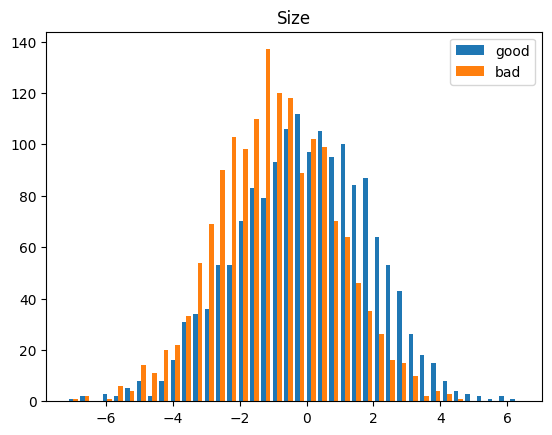

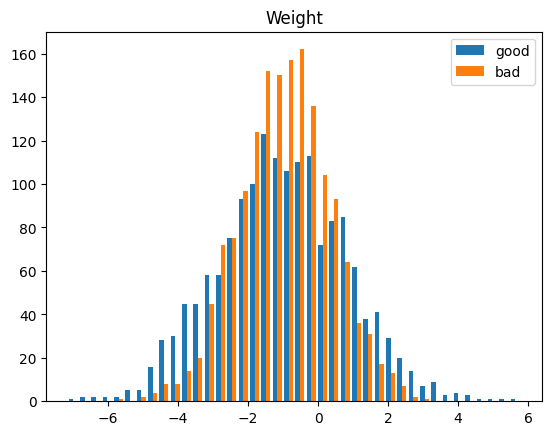

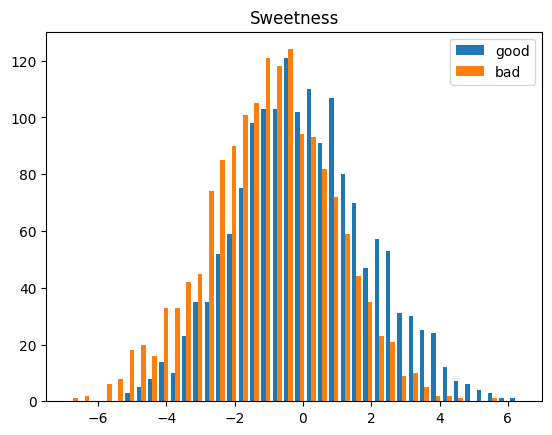

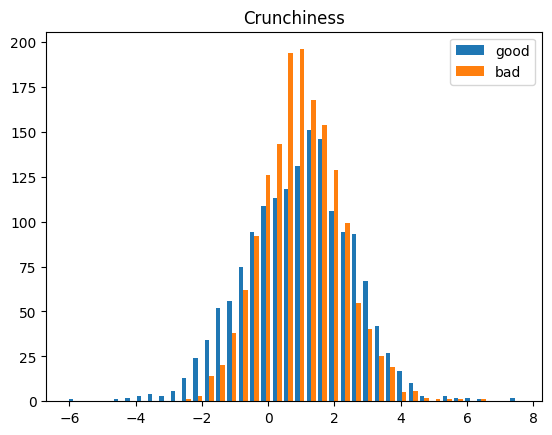

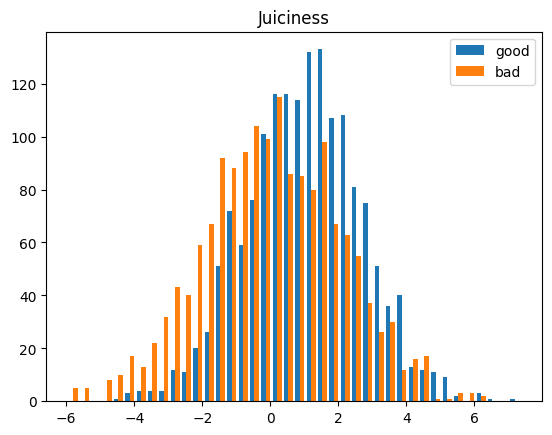

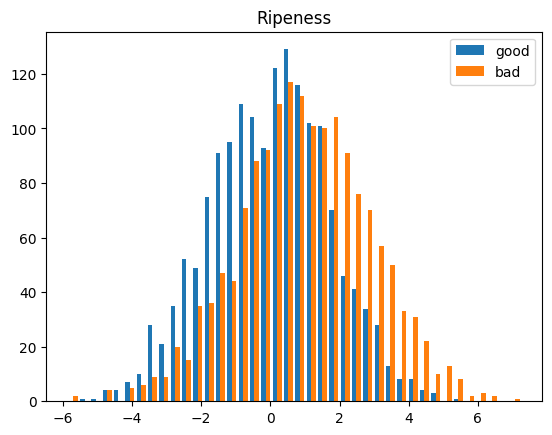

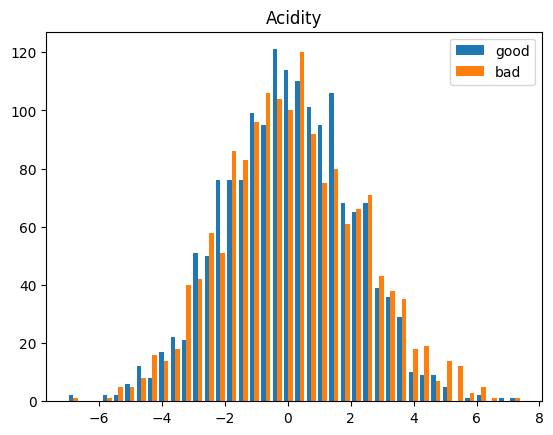

In [6]:
import matplotlib.pyplot as plt

classes = y_train.unique().tolist()

for column in X_train.columns:
    plt.figure()
    plt.hist([X_train[y_train == cls][column] for cls in classes], label=classes, bins=40)
    plt.title(column)
    plt.legend()
    plt.show()

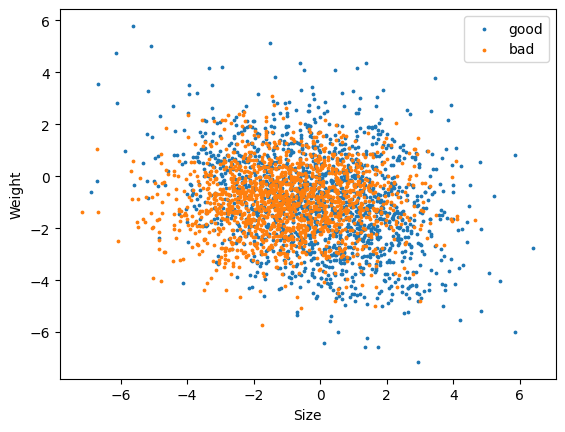

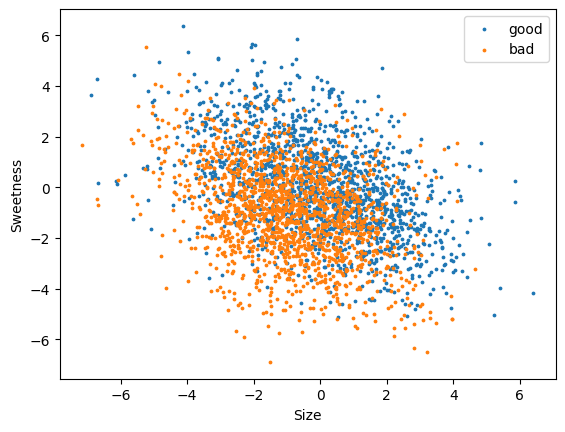

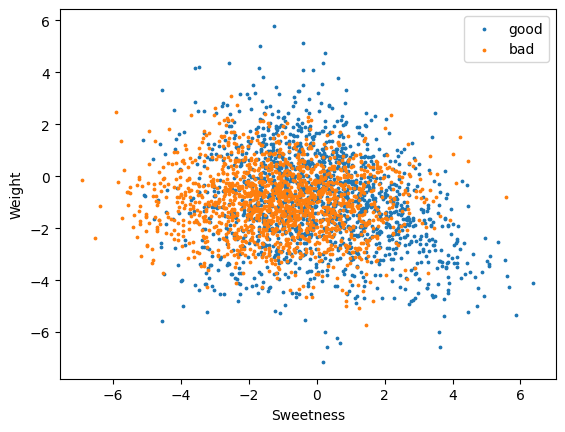

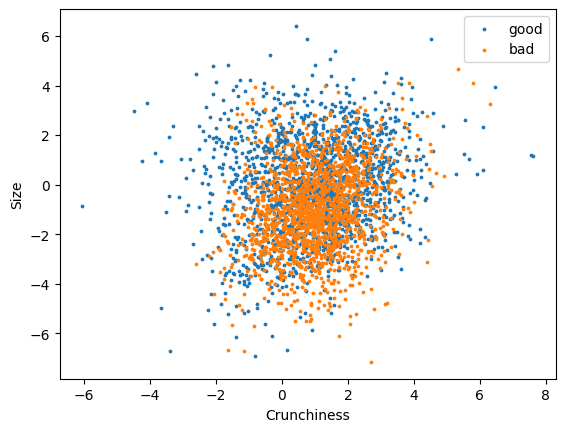

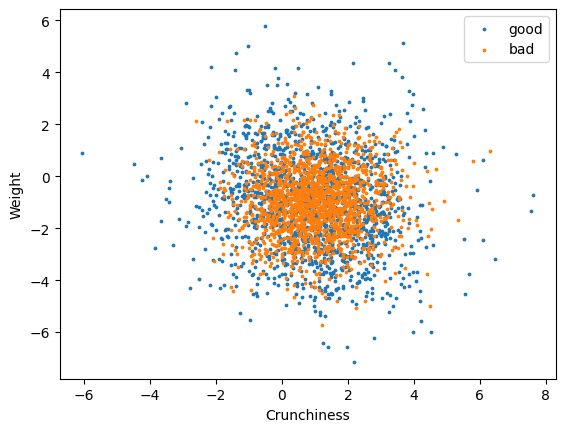

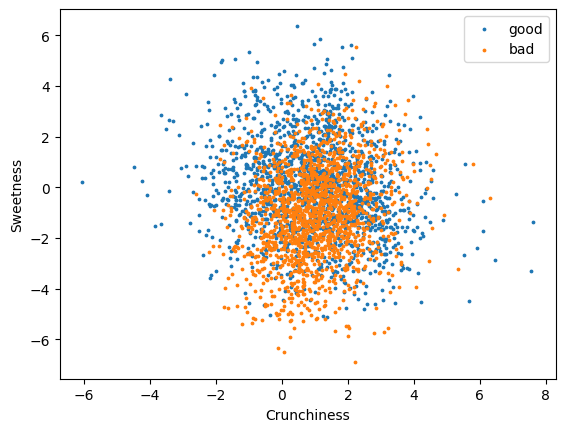

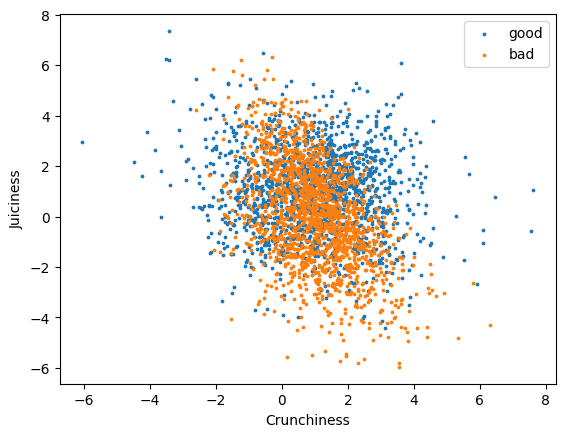

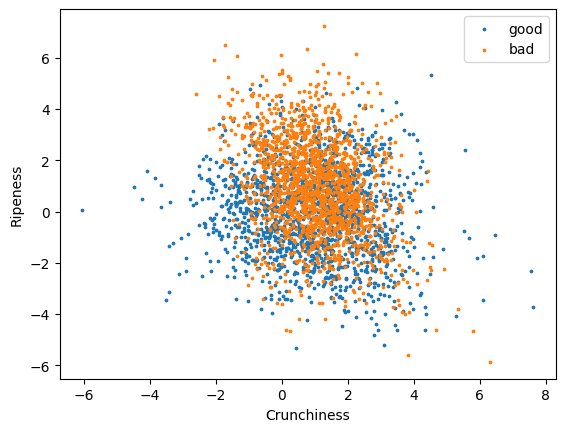

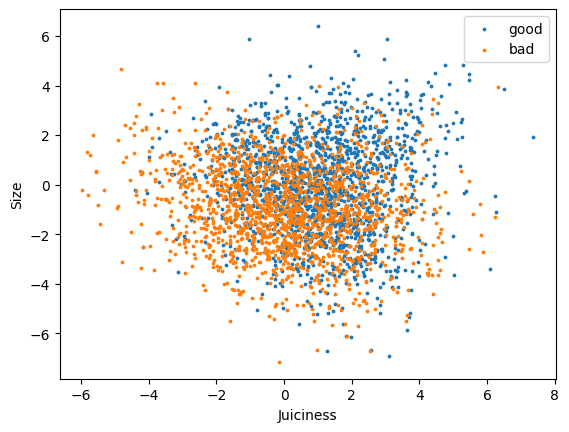

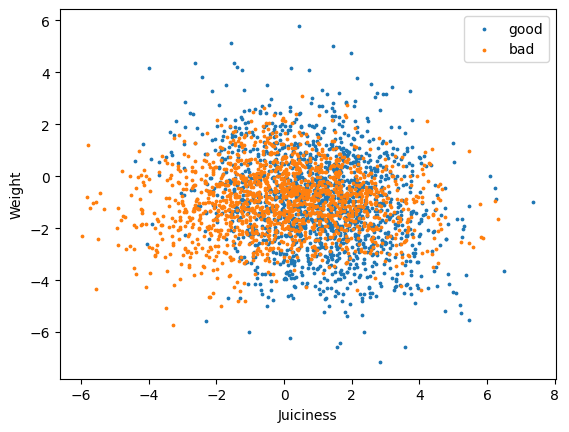

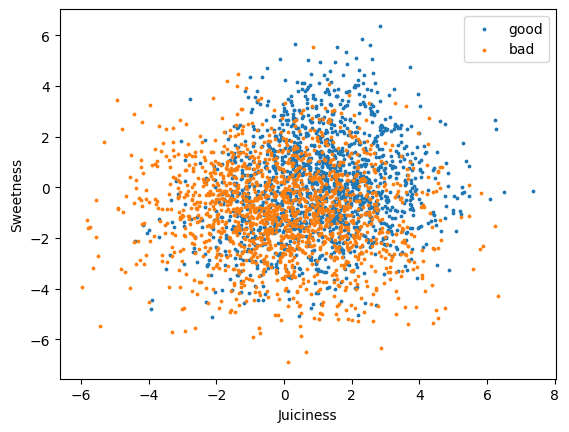

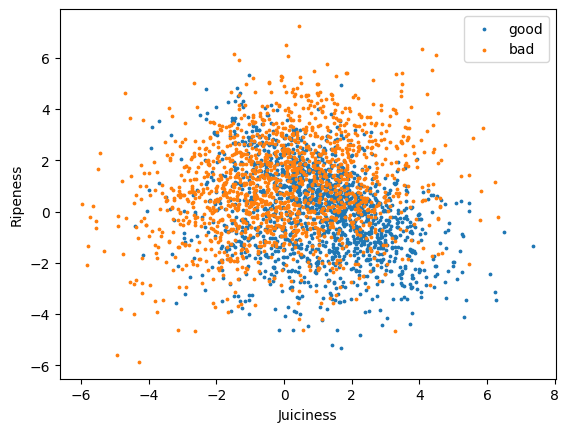

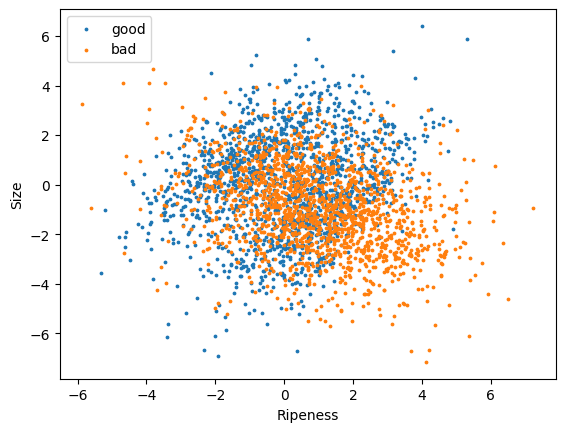

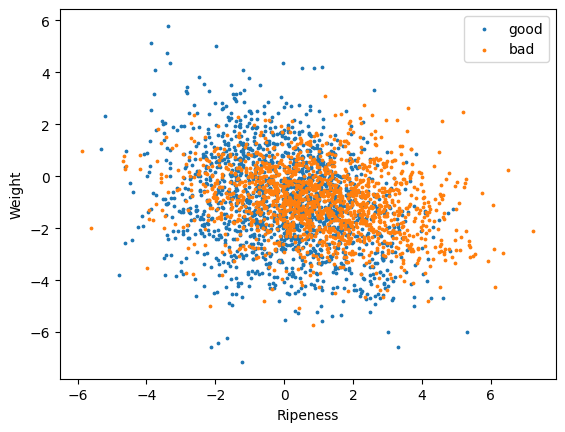

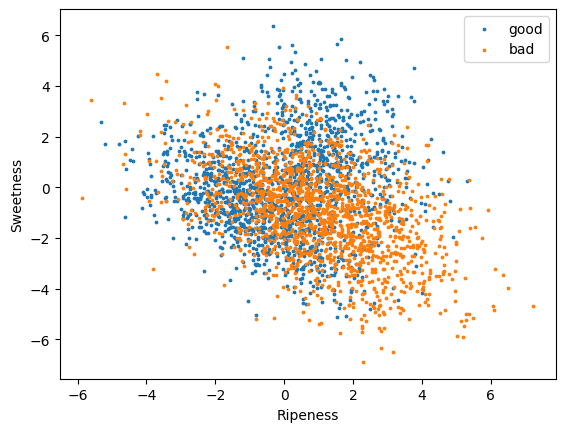

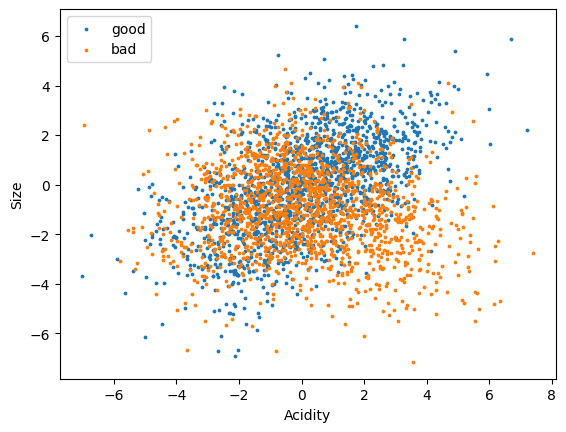

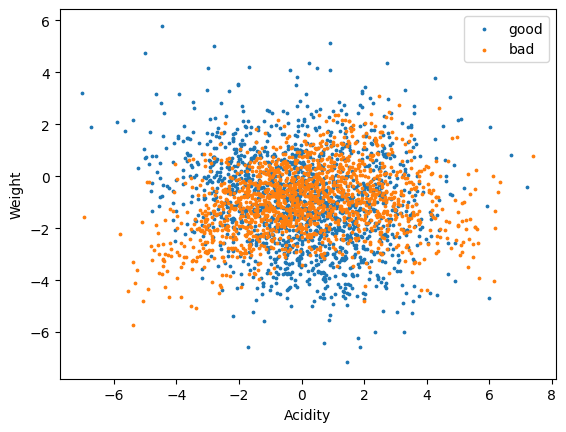

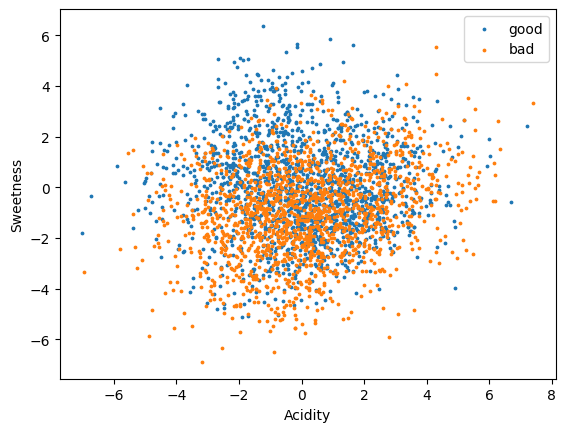

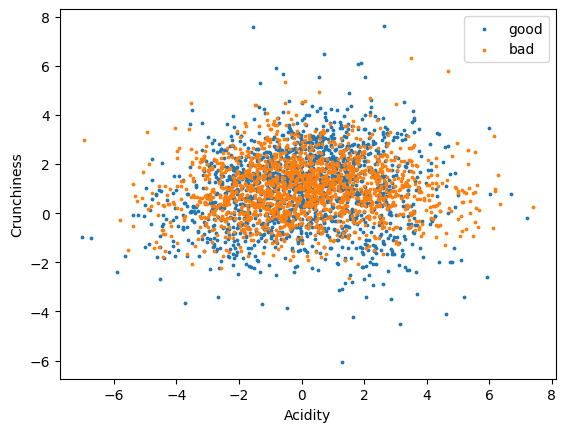

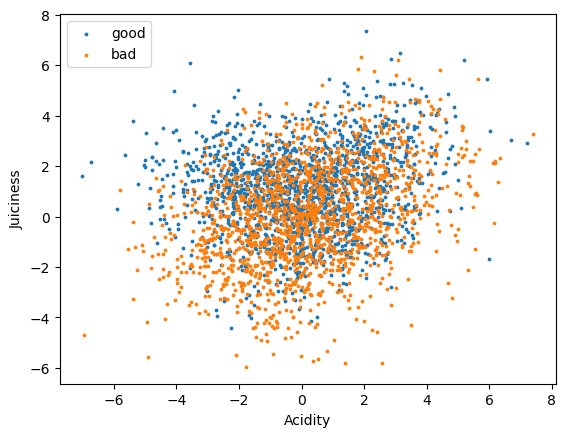

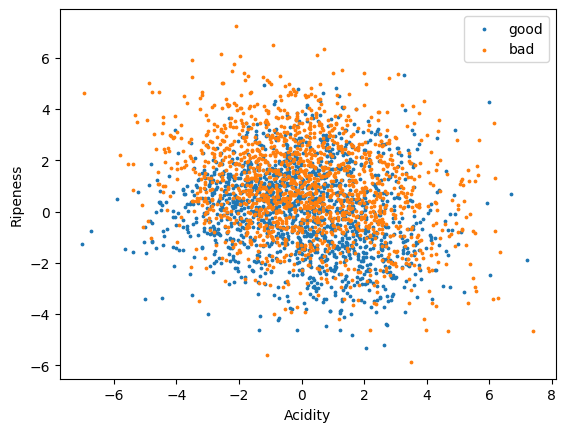

In [7]:
for col1 in X_train.columns:
    for col2 in X_train.columns:
        if col1 >= col2:
            continue
        plt.figure()
        for cls in classes:
            plt.scatter(
                X_train[y_train == cls][col1],
                X_train[y_train == cls][col2],
                s=3,
                label=cls,
            )
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.show()

**Questão 1** (1,0 pt.): Este *dataset* está estranho... "Weight" negativo, "Size" negativo... 

Leia a documentação no inicio e explique porque.

Nessa questão eu utilizei o Chat GPT, dando como contextualização a descrição do dataset e uma explicação simplificada de que esses valores negativos são resultado do processo de normalização com o StandardScaler, que seriam benéficos para algoritmos de classificação sensíveis à escala dos dados, ai ele complementou a explicação com mais detalhes sobre o StandardScaler e a normalização dos dados.

### Análise dos Valores Negativos no Dataset

Os valores negativos nas features como "Weight" e "Size" são intrigantes, especialmente porque esses atributos são intrinsecamente positivos. A explicação para essa anomalia reside no processo de normalização dos dados, particularmente com o uso do StandardScaler.

### Uso do StandardScaler

**O que é o StandardScaler?**
- O `StandardScaler` é uma técnica de normalização que transforma os dados de tal maneira que cada feature terá média zero e desvio padrão unitário. Isso é feito subtraindo a média da feature e dividindo pelo desvio padrão.

$$ \text{Z} = \frac{(X - \mu)}{\sigma} $$

Onde:
- X é o valor original da feature.
- mu é a média da feature.
- sigma é o desvio padrão da feature.

**Por que Normalizar os Dados?**
- **Consistência nas Unidades**: Diferentes features podem ter diferentes escalas e unidades. Normalizar os dados coloca todas as features na mesma escala, o que é crucial para algoritmos de machine learning sensíveis à escala dos dados, como SVMs e redes neurais.
- **Convergência Rápida**: Em algoritmos baseados em gradiente, como regressão logística e redes neurais, a normalização ajuda a acelerar a convergência.
- **Melhor Desempenho**: Normalização pode levar a um desempenho melhor e mais estável do modelo.

### Valores Negativos nas Features

**Por que Features como "Weight" e "Size" Podem se Tornar Negativas?**
- Após a normalização, os valores das features são transformados para que tenham média zero e desvio padrão unitário. Isso significa que alguns valores que estavam abaixo da média original se tornarão negativos.
- Esse processo não significa que os pesos ou tamanhos originais das maçãs eram negativos, mas sim que, em relação à média e desvio padrão dessas features, alguns valores estão abaixo da média.

**Exemplo:**
- Suponha que a média do peso das maçãs seja 150 gramas e o desvio padrão seja 20 gramas.
- Um valor de peso original de 140 gramas, após a normalização, seria transformado para:

$$ \text{Z} = \frac{(140 - 150)}{20} = -0.5 $$

### Conclusão

Os valores negativos nas features "Weight" e "Size" são resultado do processo de normalização com o `StandardScaler`. Embora esses valores possam parecer estranhos à primeira vista, eles são uma representação normalizada que permite aos algoritmos de machine learning tratar os dados de maneira mais eficiente e eficaz. A normalização é uma etapa importante no pré-processamento dos dados, especialmente para algoritmos que são sensíveis à escala das features.

**Questão 2** (1,0 pt.): Qual o valor da acurácia do modelo de referência (dummy classifier)?

A acurácia do modelo de referência (dummy classifier) basta prever a classe mais frequente no conjunto de dados. Para calcular a acurácia, podemos usar a fórmula:

$$ \text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}} $$

**Questão 3** (1,0 pt.): Faça uma *pipeline* contendo:

- Um `StandardScaler`;
- Uma `PCA(n_components=2)`

e obtenha as duas primeiras componentes principais do *dataset*. Faça um *scatter plot* com essas componentes.

In [11]:
# Calcular as frequências das classes no conjunto de dados de treinamento
class_frequencies = y_train.value_counts(normalize=True)

# Mostrar as frequências das classes
print(class_frequencies)

# Determinar a classe mais frequente
most_frequent_class = class_frequencies.idxmax()
most_frequent_class_frequency = class_frequencies.max()

# Mostrar a acurácia do dummy classifier em porcentagem
print(f'\nAcurácia do dummy classifier: {most_frequent_class_frequency:.2%}')

Quality
good    0.501563
bad     0.498437
Name: proportion, dtype: float64

Acurácia do dummy classifier: 50.16%


**Questão 4** (2,5 pt.): 

a) (0,5 pts.) Faça uma pipeline contendo:

- Um `StandardScaler()` chamado `scaler`;
- Um estágio `PolynomialFeatures(degree=2, include_bias=False)` chamado `poly`;
- Um `LogisticRegression(solver='liblinear')` chamado `model`.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Construir a pipeline (Todas as variáveis são numéricas e serão tratadas igualmente)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LogisticRegression(solver='liblinear'))
])

# Exibir a pipeline construída
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LogisticRegression(solver='liblinear'))])

b) (1,0 pt.) Agora busque os melhores hiperparâmetros desta pipeline com um `GridSearchCV` testando o seguinte *grid*:

In [15]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'model__C': [0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2'],
}

from sklearn.model_selection import GridSearchCV

# Criar o GridSearchCV com validação cruzada de 5 folds
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros: ", grid_search.best_params_)
print("\nMelhor modelo encontrado: ", grid_search.best_estimator_)

Melhores hiperparâmetros:  {'model__C': 100, 'model__penalty': 'l1', 'poly__degree': 3}

Melhor modelo encontrado:  Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model',
                 LogisticRegression(C=100, penalty='l1', solver='liblinear'))])


c) (1,0 pt.) Usando o melhor modelo do item (b) (ou a pipeline não-otimizada do item (a), se você não conseguiu fazer o item (b)), construa a curva ROC (`sklearn.metrics.roc_curve`) e ache a área sob a curva ROC (`sklearn.metrics.roc_auc_score`).

Para essa questão foi usado o Chat GPT, sendo que o input foi o enunciado da questão e também o melhor modelo pelo GridSearch realizado na questão anterior, e o output foi o código utilizado na questão.

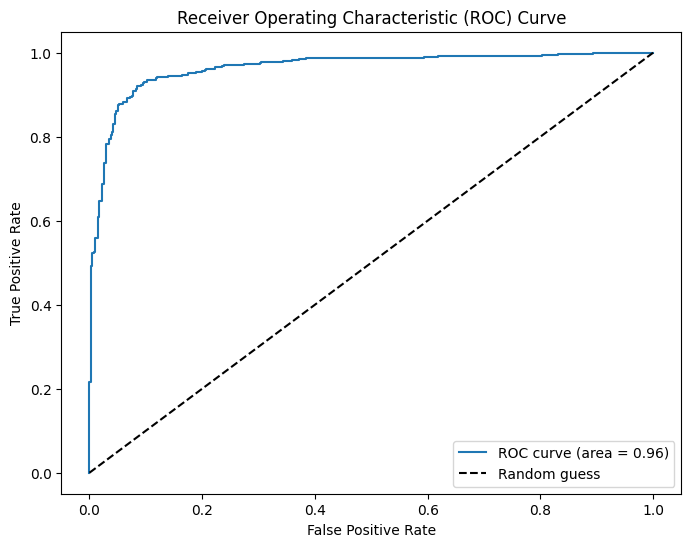

Área Sob a Curva ROC (AUC): 0.9637


In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Usar o melhor modelo encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

# Converter as etiquetas para valores binários
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Previsões de probabilidade
y_scores = best_model.predict_proba(X_test)[:, 1]

# Construir a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_binarized, y_scores)

# Calcular a Área Sob a Curva ROC (AUC)
roc_auc = roc_auc_score(y_test_binarized, y_scores)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Mostrar o AUC
print(f"Área Sob a Curva ROC (AUC): {roc_auc:.4f}")



**Questão 5** (1,0 pt.) Compare o desempenho preditivo da sua pipeline otimizada acima versus um `RandomForestClassifier`, usando validação cruzada e teste de hipótese.

Para essa questão também utilizei o auxílio do Chat GPT, utilizando novamente como prompt o enunciado da questão e o código do modelo otimizado pelo GridSearch, e o output foi o código utilizado na questão.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats

# Usar o melhor modelo encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

# Criar o RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Realizar validação cruzada para ambos os modelos
cv_scores_best_model = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

# Teste de hipótese (t-test) para comparar as performances dos modelos
t_stat, p_value = stats.ttest_ind(cv_scores_best_model, cv_scores_rf)

# Mostrar os resultados
print(f"Desempenho do melhor modelo da pipeline: {cv_scores_best_model.mean():.4f} ± {cv_scores_best_model.std():.4f}")
print(f"Desempenho do RandomForestClassifier: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")
print(f"Estatística t: {t_stat:.4f}, valor p: {p_value:.4f}")

# Interpretação do teste de hipótese
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença estatisticamente significativa entre os desempenhos dos modelos.")
else:
    print("Não rejeitamos a hipótese nula: Não há uma diferença estatisticamente significativa entre os desempenhos dos modelos.")


Desempenho do melhor modelo da pipeline: 0.8962 ± 0.0059
Desempenho do RandomForestClassifier: 0.8759 ± 0.0051
Estatística t: 5.2125, valor p: 0.0008
Rejeitamos a hipótese nula: Há uma diferença estatisticamente significativa entre os desempenhos dos modelos.


**Questão 6** (0,5 pt.) Qual a acurácia de teste do melhor modelo da questão 5?

In [22]:
from sklearn.metrics import accuracy_score

# Ajustar o melhor modelo encontrado pelo GridSearchCV (Melhor modelo da questão 5 com significância estatística) aos dados de treinamento 
best_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_test_pred = best_model.predict(X_test)

# Calcular a acurácia no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar a acurácia de teste do melhor modelo em porcentagem
print(f'Acurácia de teste do melhor modelo: {test_accuracy:.2%}')

Acurácia de teste do melhor modelo: 91.00%


**Questão 7** (3.0 pts.)

Vemos abaixo uma seleção de tópicos em Machine Learning e uma seleção de interlocutores. Escolha 2 tópicos, 2 interlocutores, e a associação 1-para-1 entre tópicos e interlocutores. Explique os tópicos escolhidos para os interlocutores correspondentes.

Interlocutores:

- O Marcos Lisboa
    - Economista, ex-presidente do Insper, conhece muito bem estatística, interessado pelos problemas economicos do Brasil.
- Um aluno de colegial prestes a se formar
    - Tem alguma noção de matemática, geometria, estatística, mas muito simples.
- Um entrevistador de emprego de uma empresa renomada (e.g. FAANG)
    - É um engenheiro experiente, e sabe bem os conceitos todos, mas quer saber se você sabe explicar de modo coerente, enxuto e completo. Sem encher linguiça.
- Um professor de Cálculo ou de Matemática da Variação
    - Domina cálculo multivariado, estatística, programação. Quer conhecer mais a fundo o assunto que você vai explicar, e a conexão com a disciplina dele.
- Um professor de Sociologia e Política, ou de Grandes Desafios da Engenharia
    - Entende matemática e estatística de colegial e um pouco de Cálculo. Interessado em problemas da sociedade.
- Um médico oncologista
    - Conhece estatística surpreendemente bem, interessado em problemas de Medicina.

    
Tópicos:

- Árvore de decisão
- Machine Learning e sociedade
- K-Means
- Validação cruzada para ajuste de hiperparâmetros
- Support vector machines
- Curva ROC
- Gradient descent
- Redes neurais
- Seleção de variáveis com Lasso

Use gráficos, tabelas, formulas, código, o que você quiser para auxiliar na sua explicação. Use quantas células quiser do notebook. Se precisar adicionar um diagrama ilustrativo, pode usar o https://www.draw.io/. Exporte seu desenho para PNG e inclua no notebook com o código-exemplo desta célula:

```
![exemplo](exemplo.png "Exemplo de diagrama PNG")
```

Neste caso, <font color='red'>não se esqueça de submeter também seu arquivo de imagem!</font>

Rubrica de avaliação por par conceito-interlocutor:


| Conceito | Nota | Definição |
|----------|------|-----------|
| I        | 0.0  | Não fez, ou escreveu coisas sem sentido. |
| D        | 0.5  | Usou termos técnicos e matemática não disponível ao interlocutor. Faltam partes fundamentais do conceito. Não construiu uma narrativa de interesse ao interlocutor. |
| C        | 1.0  | Construiu uma explicação correta da mecânica do conceito, sem uma intuição de por que funciona. Faltam ideias importantes, mas não essenciais do conceito. Não construiu uma narrativa de interesse ao interlocutor. |
| B        | 1.5  | Construiu uma explicação da mecânica e da intuição por trás do modelo. Faltam ideias importantes, mas não essenciais do conceito, ou tem excesso de ideias não tão centrais à explicação (vulgo “encheu linguiça”). |
| A        | 2.0  | Construiu uma explicação bem completa e enxuta da mecânica e da intuição por trás do conceito. Trouxe uma narrativa que interesse ao interlocutor. |